In [1]:
__nbid__ = '0006'
__author__ = 'Ragadeepika Pucha <rpucha@arizona.edu>, Stephanie Juneau <stephanie.juneau@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>' 
__version__ = '20251205' # yyyymmdd
__datasets__ = ['sdss_dr16', 'desi_dr1']  
__keywords__ = ['sparcl', 'spectra', 'database'] 

# Comparando espectros de SDSS y DESI usando SPARCL

*Ragadeepika Pucha (U. Arizona), Stéphanie Juneau (NOIRLab) y el equipo de Astro Data Lab*

#### (_Traducción de [02_DESI_SDSS_Comparison.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/DESI/02_DESI_SDSS_Comparison.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#imports)
* [Autenticación](#auth)
* [SPARCL](#sparcl)
* [Selección de candidatos](#cand_sel)
    * [Exploración de datos](#data)
    * [Objetos en común entre SDSS DR16 y DESI EDR](#common)
    * [Selección de galaxias con líneas [OII]](#oii_emission)
* [Acceso a espectros](#spectral_access)
    * [Comparación de espectros SDSS DR16 y DESI EDR](#spec_comparison)
* [Recursos y referencias](#resources)

<a class="anchor" id="goals"></a>
# Objetivos

En este notebook utilizamos [SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/) (SPectra Analysis and Retrievable Catalog Lab) para comparar espectros de SDSS DR16 y DESI DR1. Mostramos cómo usar la herramienta de exploración de datos de SPARCL para acceder a los espectros disponibles de objetos en una región específica del cielo, aplicando restricciones en redshift y tipo espectral. Luego, comparamos los espectros provenientes de SDSS DR16 y DESI DR1.

# Resumen

El estudio espectroscópico de objetos astronómicos es crucial para comprender en detalle su física y evolución. Los espectros estelares nos informan sobre las edades, temperaturas y composiciones químicas de las estrellas; mientras que los espectros de galaxias nos brindan información sobre las propiedades estelares, del gas y del polvo en las galaxias, incluyendo su cinemática. Los surveys espectroscópicas permiten así un análisis estadístico detallado de diferentes muestras de objetos. Dos surveys espectroscópicos clave son el *Sloan Digital Sky Survey* ([SDSS](https://www.sdss4.org/dr16/)) y el *Dark Energy Spectroscopic Instrument* ([DESI](https://www.desi.lbl.gov/)).

**Sloan Digital Sky Survey (SDSS)**

El SDSS utiliza el telescopio óptico de 2.5 metros en el Observatorio Apache Point, en Nuevo México, y ha estado recolectando datos fotométricos y espectroscópicos durante más de 20 años.  
El survey espectroscópica de SDSS I/II (2000–2008) fue realizada con el espectrógrafo “SDSS”, que podía recolectar espectros de 640 objetos simultáneamente. Para SDSS III y posteriores, ese espectrógrafo fue retirado y se incorporó el espectrógrafo “BOSS” de 1000 fibras. La información sobre el diseño y desempeño de estos espectrógrafos está disponible en [Smee et al. 2013](https://ui.adsabs.harvard.edu/abs/2013AJ....146...32S/abstract).

**Dark Energy Spectroscopic Instrument (DESI)**

El survey de DESI se está llevando a cabo actualmente con el telescopio Mayall de 4 metros en el Observatorio de Kitt Peak. Su espectrógrafo de 5000 fibras ha estado observando estrellas, galaxias y cuásares desde 2020. En poco más de un año, el número de espectros obtenidos por DESI ha superado al de todas los surveys espectroscópicos previas, incluyendo SDSS. El Primer Lanzamiento de Datos de DESI (DR1) incluye espectros de más de 18 millones de objetos únicos observados durante los primeros 13 meses del survey principal (“Año 1”). También incluye un reprocesamiento de los mismos datos de puesta en marcha y de validación que formaron parte del Lanzamiento Temprano de Datos (EDR). Una descripción general del instrumento se presenta en [Abareshi et al. 2022](https://ui.adsabs.harvard.edu/abs/2022arXiv220510939A/abstract).

La siguiente tabla resume las principales diferencias entre los surveys espectroscópicos de SDSS (BOSS) y DESI:

| Propiedad                          | SDSS (BOSS)              | Espectrógrafo de DESI      |
|-----------------------------------|--------------------------|-----------------------------|
| Diámetro de la fibra              | 3"  (2")                 | 1.5"                        |
| N° de espectros simultáneos       | 640 (1000)               | 5000                        |
| Rango espectral                   | 3800 - 9200 Å            | 3600 - 9800 Å               |
| Resolución espectral              | 110 - 190 km/s           | 60 - 150 km/s               |
| Magnitud límite                   | r < 17.7 mag             | r < 24.5 mag                |
| Densidad espacial                 | ~ 90 deg⁻²               | ~ 700 deg⁻²                 |

En este notebook presentamos la funcionalidad de exploración de datos de SPARCL y luego mostramos cómo acceder a espectros de SDSS DR16 y DESI DR1 usando esta herramienta. Finalmente, comparamos los espectros de objetos en común, enfocándonos en el flujo y en la resolución espectral alcanzada por cada survey.


<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL (Juneau et al. 2024)}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

For this notebook specifically, please acknowledge:
* DESI data license and acknowledgments: https://data.desi.lbl.gov/doc/acknowledgments/
* Astro Data Lab: https://datalab.noirlab.edu/acknowledgments.php
* SPARCL: https://astrosparcl.datalab.noirlab.edu/sparc/acknowledgments

<a class="anchor" id="imports"></a>
# Importaciones y configuración

In [1]:
import numpy as np
np.seterr(divide = 'ignore')    ## Ignora advertencias por división entre cero

from astropy.table import Table, join, hstack
from astropy.coordinates import SkyCoord, search_around_sky
import astropy.units as u

from getpass import getpass

import matplotlib.pyplot as plt
%matplotlib inline

# Data Lab
from dl import authClient as ac, queryClient as qc

## SPARCL
from sparcl.client import SparclClient

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
ac.whoAmI()

In [2]:
## Mejorando la apariencia de las gráficas de matplotlib
settings = {
    'font.size':16,
    'axes.linewidth':2.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':1.5,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':1.5,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True
}

plt.rcParams.update(**settings)

<a class="anchor" id="sparcl"></a>
# SPARCL

SPARCL (SPectra Analysis and Retrievable Catalog Lab) es un servicio de acceso espectral del programa Community Science and Data Center (CSDC) de NSF NOIRLab. Permite un descubrimiento rápido de datos y acceso espectral que se ajusta a las especificaciones del usuario. Actualmente aloja datos de SDSS DR16, DESI EDR y DESI DR1. Más información sobre este servicio está disponible [aquí](https://sparclclient.readthedocs.io/en/latest/). Un notebook introductorio sobre cómo usar SPARCL está disponible [aquí](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SPARCL/How_to_use_SPARCL.ipynb).

In [3]:
## Cargar el cliente de SPARCL para descubrimiento de datos y acceso espectral

client = SparclClient()
client

announcement=Data set deprecation notice: on November 19, 2025 the SDSS/BOSS DR16 data sets were deprecated. Please use the new SDSS/BOSS DR17 data sets instead.


(sparclclient:1.2.8, api:13.0, https://astrosparcl.datalab.noirlab.edu/api, client_hash=b75a233b9cb2e70534b1228282fb8c1f7e5ff90b, verbose=False, connect_timeout=1.1, read_timeout=5400.0, announcement=True)

<a class="anchor" id="cand_sel"></a>
# Selección de candidatos

Seleccionamos fuentes tanto de SDSS como de DESI que cumplan con las siguientes restricciones:

    1. 208.4 ≤ A.R. ≤ 210.2
    2. 4.8 ≤ Dec ≤ 6.4
    3. 0.1 ≤ z ≤ 0.15
    4. SPECTYPE = GALAXY

La región seleccionada forma parte de la Gran Muralla de SDSS ([Vogeley et al. 2004](https://ui.adsabs.harvard.edu/abs/2004ogci.conf....5V/abstract), [Einasto et al. 2011](https://ui.adsabs.harvard.edu/abs/2011ApJ...736...51E/abstract)). Tanto SDSS como DESI tienen espectros en esta región, lo cual la hace ideal para nuestra comparación. El corte en corrimiento al rojo está motivado por la estructura de la Gran Muralla de SDSS y se eligió para comparar la línea de emisión [OII] en esta región.

<a class="anchor" id="data"></a>
## Data discovery

In [4]:
## Campos de salida requeridos desde SPARCL
out = ['sparcl_id', 'specid', 'ra', 'dec', 'redshift'] 

## Restricciones
## SPECTYPE = 'GALAXY'
## 208.4 <= RA <= 210.2
## 4.8 <= DEC <= 6.4
## 0.1 <= Redshift <= 0.15
## SPECPRIMARY = True -- considerar solo espectros primarios
## "datasetgroup" indica el survey requerido (SDSS_BOSS para SDSS-DR16 (datos de SDSS+BOSS), y DESI para los datos de DESI DR1)

sdss_cons = {'spectype':['GALAXY'], 'ra':[208.4, 210.2], 'dec':[4.8, 6.4], 'specprimary': [True], 'datasetgroup': ['SDSS_BOSS'], 'redshift': [0.1, 0.15]}
desi_cons = {'spectype':['GALAXY'], 'ra':[208.4, 210.2], 'dec':[4.8, 6.4], 'specprimary': [True], 'data_release': ['DESI-DR1'], 'redshift': [0.1, 0.15]} 

In [5]:
rec_sdss = client.find(outfields=out, constraints=sdss_cons, limit = 5000)
rec_desi = client.find(outfields=out, constraints=desi_cons, limit = 5000)

In [6]:
ra_sdss = np.array([rec['ra'] for rec in rec_sdss.records])
dec_sdss = np.array([rec['dec'] for rec in rec_sdss.records])

ra_desi = np.array([rec['ra'] for rec in rec_desi.records])
dec_desi = np.array([rec['dec'] for rec in rec_desi.records])

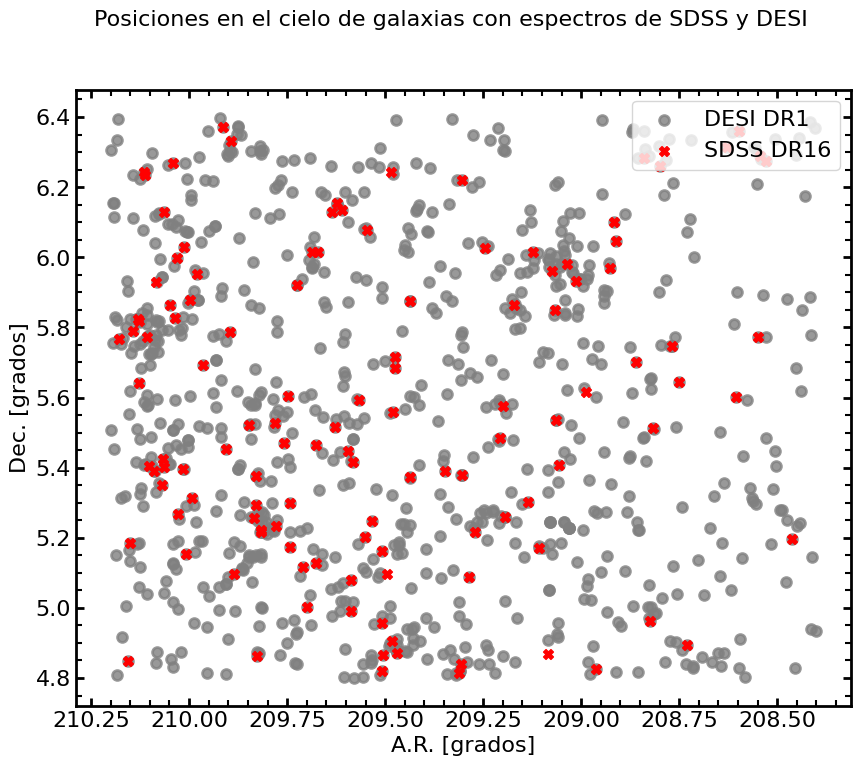

In [7]:
## Superposición de fuentes

plt.figure(figsize = (10,8))

plt.suptitle('Posiciones en el cielo de galaxias con espectros de SDSS y DESI', fontsize = 16)

plt.scatter(ra_desi, dec_desi, color = 'grey', marker = 'o', s = 50, alpha = 0.8, lw = 2.0, label = 'DESI DR1')
plt.scatter(ra_sdss, dec_sdss, color = 'r', marker = 'X', s = 50, label = 'SDSS DR16')
plt.gca().invert_xaxis()
plt.xlabel('A.R. [grados]')
plt.ylabel('Dec. [grados]')
plt.legend(loc = 'upper right', fontsize=16);

A partir de esta figura, vemos claramente que la densidad de objetivos en DESI es mucho mayor que en SDSS.

<a class="anchod" id="common"></a>
## Objetos comunes entre SDSS DR16 y DESI DR1

Usamos la función `search_around_sky` de astropy para encontrar fuentes comunes entre los dos catálogos.

In [8]:
## Encontrar fuentes comunes entre SDSS y DESI

cat_desi = SkyCoord(ra = ra_desi*u.deg, dec = dec_desi*u.deg)
cat_sdss = SkyCoord(ra = ra_sdss*u.deg, dec = dec_sdss*u.deg)

ii_desi, ii_sdss, _, _ = search_around_sky(cat_desi, cat_sdss, 0.5*u.arcsec)

In [9]:
desi_common = [rec_desi.records[ii] for ii in ii_desi]
sdss_common = [rec_sdss.records[ii] for ii in ii_sdss]

In [10]:
t_desi_common = Table(desi_common)
t_sdss_common = Table(sdss_common)

In [11]:
## Combinar las dos tablas en una sola

t_comb = hstack([t_desi_common, t_sdss_common], table_names=['desi', 'sdss'])

In [12]:
print ('Número de objetos únicos de SDSS: ', len(np.unique(t_comb['specid_sdss'])))
print ('Número de objetos únicos de DESI: ', len(np.unique(t_comb['specid_desi'])))

Número de objetos únicos de SDSS:  116
Número de objetos únicos de DESI:  122


In [13]:
## Esto sugiere que algunos objetos de SDSS han sido emparejados con dos objetos de DESI.
## Eliminamos ese objeto en particular de nuestra selección

sdss_ids_unique, indices, n_counts = np.unique(t_comb['specid_sdss'].data, return_index=True, return_counts=True)
sdss_id_repeated = sdss_ids_unique[n_counts > 1]

## Eliminando estos casos por ahora (Ejercicio: investigar qué ocurrió en esos casos)
t_comb_unique = t_comb[indices]

In [14]:
z_desi = t_comb_unique['redshift_desi']
z_sdss = t_comb_unique['redshift_sdss']

In [15]:
len(z_desi), len(z_sdss)

(116, 116)

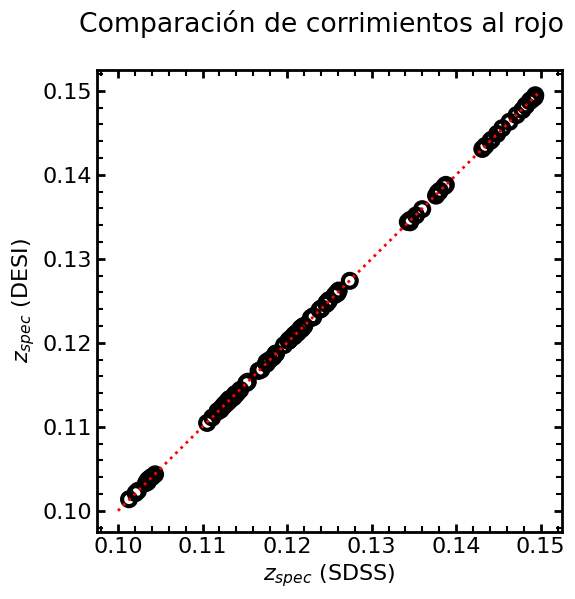

In [16]:
# Comparación de corrimientos al rojo (redshifts)
plt.figure(figsize = (6,6))
plt.suptitle('Comparación de corrimientos al rojo')

plt.scatter(z_sdss, z_desi, edgecolors = 'k', marker = 'o', s = 100, lw = 3.0, facecolors = 'none')
plt.plot([0.1, 0.15], [0.1,0.15], ls = ':', color = 'r', lw = 2.0)
plt.xlabel('$z_{spec}$ (SDSS)')
plt.ylabel('$z_{spec}$ (DESI)');

Encontramos 116 fuentes comunes entre SDSS DR16 y DESI DR1 cumpliendo con todas nuestras restricciones. La figura anterior compara los corrimientos al rojo de estas fuentes comunes en ambos surveys.

<a class="anchod" id="oii_emission"></a>
## Selección de galaxias con mediciones de [OII]

El doblete de [OII] (3726 $\mathring A$ y 3728 $\mathring A$) es típicamente difícil de resolver, pero se utiliza a menudo para seleccionar galaxias con líneas de emisión a alto corrimiento al rojo. Para comparar los espectros de SDSS DR16 y DESI DR1, queremos seleccionar la galaxia con alto flujo de [OII]. Para ello, primero seleccionamos galaxias en la región de interés que tengan mediciones distintas de cero para [OII].

Accedemos al catálogo "emissionlinesport" de la base de datos SDSS DR12 (`sdss_dr12.emissionlinesport`). Más información sobre este catálogo puede encontrarse en el [Explorador de Tablas de Data Lab](https://datalab.noirlab.edu/query.php?name=sdss_dr12.emissionlinesport).

In [17]:
## Consulta para acceder a galaxias con mediciones distintas de cero en [OII]
query = """
SELECT specobjid as specid_sdss,
flux_oii_3726, flux_oii_3726_err,
flux_oii_3728, flux_oii_3728_err,
sigma_oii_3726, sigma_oii_3728
FROM sdss_dr12.emissionlinesport
WHERE (ra >= 208.4) AND (ra <= 210.2) AND (dec >= 4.8) AND (dec <= 6.4) 
AND (flux_oii_3726_err != 0) AND (flux_oii_3728_err != 0)
"""

In [18]:
print (query)


SELECT specobjid as specid_sdss,
flux_oii_3726, flux_oii_3726_err,
flux_oii_3728, flux_oii_3728_err,
sigma_oii_3726, sigma_oii_3728
FROM sdss_dr12.emissionlinesport
WHERE (ra >= 208.4) AND (ra <= 210.2) AND (dec >= 4.8) AND (dec <= 6.4) 
AND (flux_oii_3726_err != 0) AND (flux_oii_3728_err != 0)



In [19]:
t_em = qc.query(sql = query, fmt = 'table')

In [20]:
## Buscar fuentes en el catálogo común de SDSS y DESI que tengan flujo de [OII]
## Esta parte también cambiará con SPARCL

t_oii_comb = join(t_comb_unique, t_em, keys = ['specid_sdss'])

In [21]:
len(t_oii_comb)

95

In [22]:
len(np.unique(t_oii_comb['specid_sdss'])), len(np.unique(t_oii_comb['specid_desi']))

(95, 95)

Finalmente, tenemos 95 galaxias con espectros tanto en SDSS DR16 como en DESI DR1, que presentan un flujo distinto de cero en [OII] según SDSS.

<a class="anchor" id="spectral_access"></a>
# Acceso a espectros

En esta sección mostramos cómo acceder a los espectros de todas las fuentes seleccionadas de SDSS y DESI utilizando SPARCL.

In [23]:
## Identificadores únicos para SDSS y DESI
ids_sdss = [str(idx) for idx in t_oii_comb['sparcl_id_sdss'].data]
ids_desi = [str(idx) for idx in t_oii_comb['sparcl_id_desi'].data]

In [24]:
## Usar client.retrieve para obtener los espectros
## Esto recupera los 95 espectros a la vez
sel = ['wavelength', 'flux', 'ivar', 'model', 'sparcl_id']

spec_sdss = client.retrieve(uuid_list=ids_sdss, include = sel)
spec_desi = client.retrieve(uuid_list=ids_desi, include = sel)

In [25]:
## Reordenar los registros para que coincidan con la tabla original

res_sdss = spec_sdss.reorder(ids_sdss)
res_desi = spec_desi.reorder(ids_desi)

<a class="anchor" id="spec_comparison"></a>
## Comparación de espectros de SDSS DR16 y DESI DR1

Comparamos los espectros de SDSS y DESI para la fuente con la mayor relación señal-ruido en [OII] según SDSS.  
La siguiente función es útil para acceder a cualquier espectro, dado su registro SPARCL y su corrimiento al rojo.

In [26]:
def get_restframe_spectra(sparcl_rec, z, rest_frame = True):
    """
    Función para extraer el espectro desde un registro SPARCL dado

    Parámetros
    ----------
    sparcl_rec : dict
        Registro SPARCL de un objeto dado

    z : float
        Corrimiento al rojo del objeto

    rest_frame : bool
        Indica si se debe devolver el espectro en el marco de reposo.
        Por defecto es True.

    Retorna
    -------
    wavelength : array
        Arreglo de longitudes de onda del espectro.
        Devuelve los valores en el marco de reposo si rest_frame = True

    flux : array
        Arreglo de flujo del espectro.
        Devuelve los valores en el marco de reposo si rest_frame = True

    ivar : array
        Arreglo de varianza inversa del espectro.
        Devuelve los valores en el marco de reposo si rest_frame = True
    """
    
    wavelength = sparcl_rec.wavelength
    flux = sparcl_rec.flux
    ivar = sparcl_rec.ivar
    
    if (rest_frame == True):
        wavelength = wavelength/(1+z)
        flux = flux*(1+z)
        ivar = ivar/((1+z)**2)
    
    return (wavelength, flux, ivar)

In [27]:
len(t_oii_comb)

95

In [28]:
## Calcular el flujo y la S/N del doblete de [OII]
total_oii_flux = t_oii_comb['flux_oii_3726'].data + t_oii_comb['flux_oii_3728'].data
total_oii_err = np.sqrt((t_oii_comb['flux_oii_3726_err'].data**2)+(t_oii_comb['flux_oii_3728_err'].data**2))
oii_snr = total_oii_flux/total_oii_err

## Calcular el ancho promedio del doblete de [OII]
sig_oii = (t_oii_comb['sigma_oii_3726']+t_oii_comb['sigma_oii_3728'])/2.

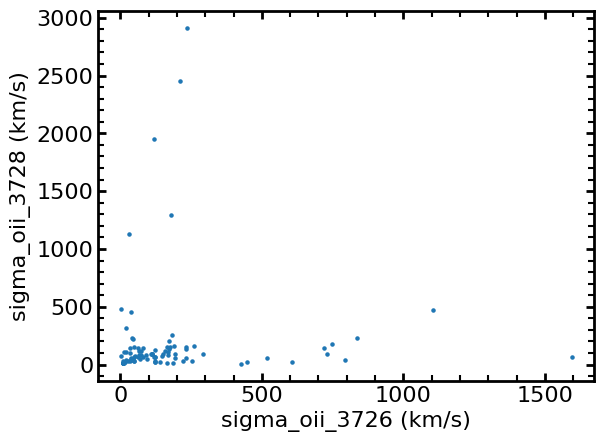

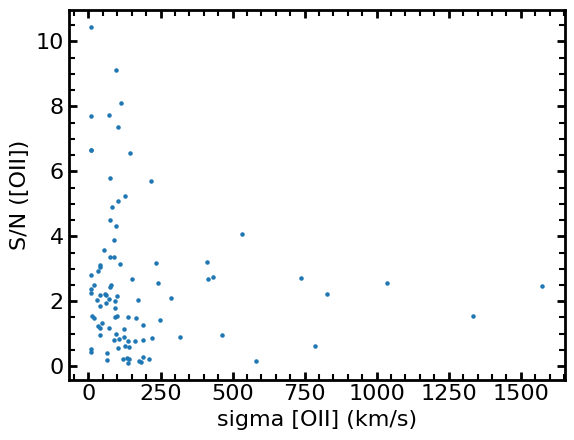

In [29]:
# Comprobación básica: graficar los anchos de línea
plt.scatter(t_oii_comb['sigma_oii_3726'], t_oii_comb['sigma_oii_3728'], s=5)
plt.xlabel('sigma_oii_3726 (km/s)')
plt.ylabel('sigma_oii_3728 (km/s)')
plt.show()

# Otra comprobación básica: S/N versus ancho de línea promedio
plt.scatter(sig_oii, oii_snr, s=5)
plt.xlabel('sigma [OII] (km/s)')
plt.ylabel('S/N ([OII])')
plt.show()

In [30]:
# Seleccionar una fuente de ejemplo con alta S/N en [OII] y un ancho de línea razonable
ii = np.where((oii_snr>8)&(sig_oii>20)&(sig_oii<200))[0][0]

ii

15

In [31]:
lam_desi, flux_desi, ivar_desi = get_restframe_spectra(res_desi.records[ii], t_oii_comb['redshift_desi'].data[ii], rest_frame = True)
lam_sdss, flux_sdss, ivar_sdss = get_restframe_spectra(res_sdss.records[ii], t_oii_comb['redshift_sdss'].data[ii], rest_frame = True)

In [32]:
err_sdss = np.sqrt(1/ivar_sdss)
err_desi = np.sqrt(1/ivar_desi)

Primero, graficamos los espectros de DESI y SDSS de la misma galaxia en todo el rango espectral común. El espectro de DESI se muestra en negro, mientras que el de SDSS está en rojo.

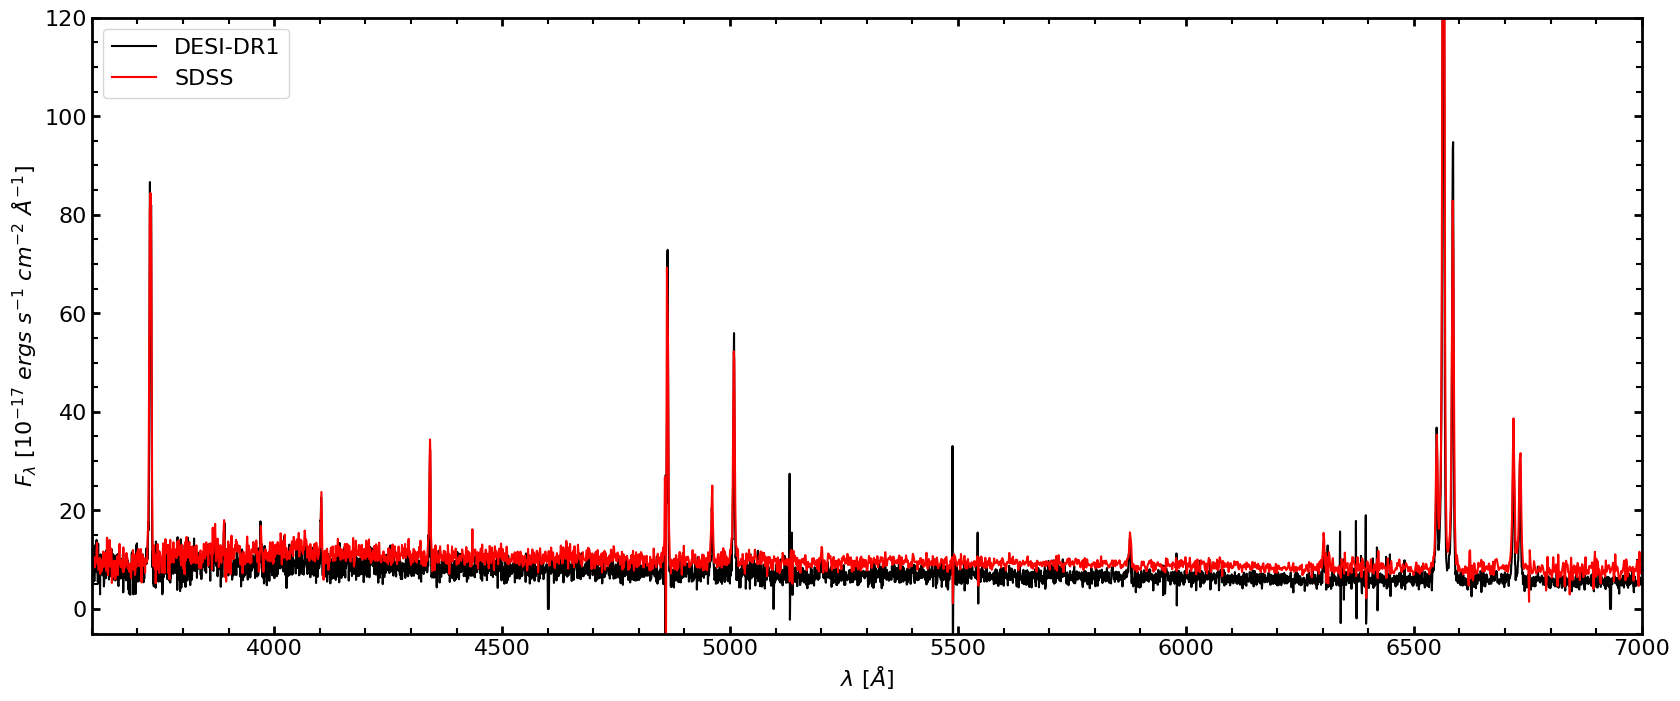

In [33]:
plt.figure(figsize = (20, 8))

plt.plot(lam_desi, flux_desi, color = 'k', label = 'DESI-DR1')
plt.plot(lam_sdss, flux_sdss, color = 'r', label = 'SDSS')
plt.xlim([3600, 7000])
plt.ylim([-5, 120])
plt.xlabel('$\lambda~[\AA]$')
plt.ylabel('$F_{\lambda}~[10^{-17}~ergs~s^{-1}~cm^{-2}~{\AA}^{-1}]$')
plt.legend(loc = 'upper left');

Luego, comparamos los espectros en un rango espectral más estrecho alrededor de la región del doblete de [OII].  
El espectro observado en ambos paneles se muestra en negro con las incertidumbres como una zona sombreada en gris.

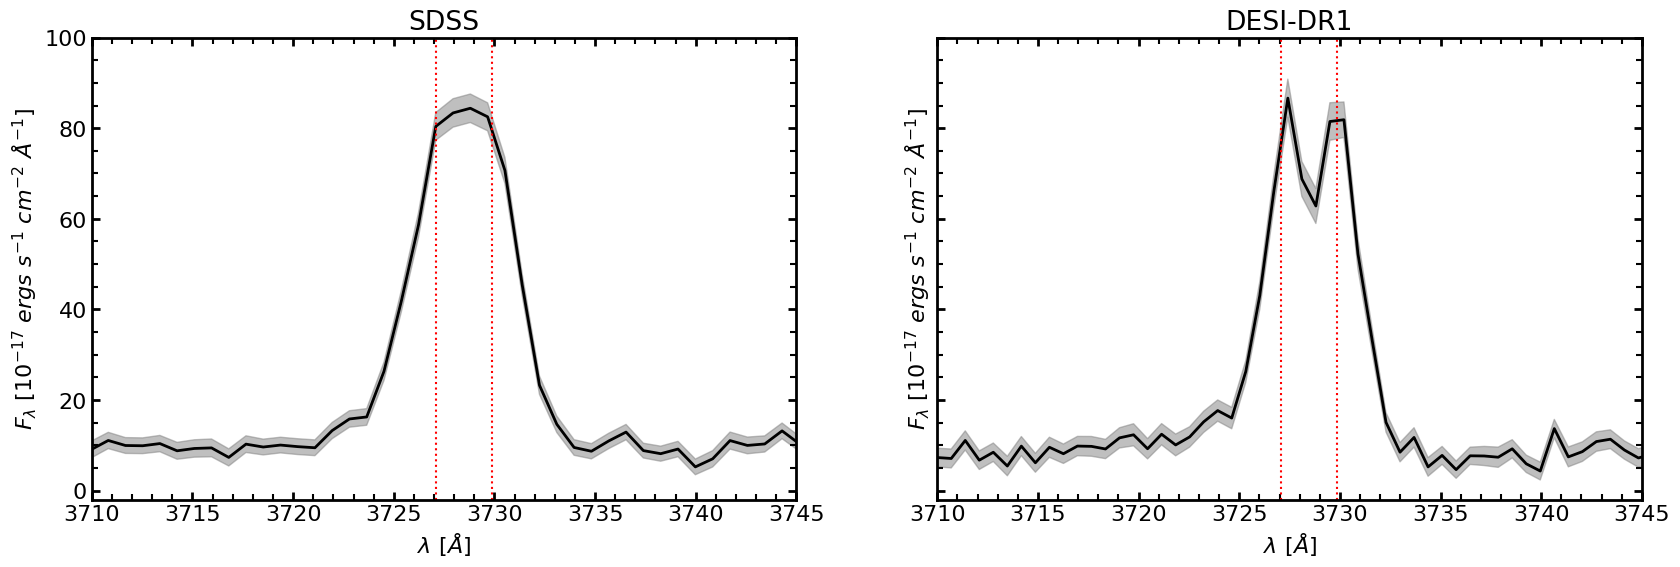

In [34]:
fig, axs = plt.subplots(1,2,figsize = (20,6), sharex = True, sharey = True)

axs[0].plot(lam_sdss, flux_sdss, color = 'k', lw = 2.0)
axs[0].fill_between(lam_sdss, flux_sdss-err_sdss, flux_sdss+err_sdss, color = 'grey', alpha = 0.5)
axs[1].plot(lam_desi, flux_desi, color = 'k', lw = 2.0)
axs[1].fill_between(lam_desi, flux_desi-err_desi, flux_desi+err_desi, color = 'grey', alpha = 0.5)
axs[0].axvline(3727.092, color = 'r', ls = ':')
axs[0].axvline(3729.875, color = 'r', ls = ':')
axs[1].axvline(3727.092, color = 'r', ls = ':')
axs[1].axvline(3729.875, color = 'r', ls = ':')

axs[0].set(xlabel = '$\lambda~[\AA]$', ylabel = '$F_{\lambda}~[10^{-17}~ergs~s^{-1}~cm^{-2}~{\AA}^{-1}]$', title = 'SDSS')
axs[1].set(xlim = [3710,3745], ylim = [-2,100], title = 'DESI-DR1', xlabel = '$\lambda~[\AA]$', ylabel = '$F_{\lambda}~[10^{-17}~ergs~s^{-1}~cm^{-2}~{\AA}^{-1}]$')

plt.show()

A partir de las gráficas comparativas anteriores, concluimos lo siguiente:

* El flujo de la fuente medido por SDSS es ligeramente mayor que el medido por DESI. Esto se nota más en el caso del continuo. El flujo observado suele depender del seeing durante las observaciones espectroscópicas y del tamaño de la fibra. Esta diferencia observada se debe en parte a la diferencia en tamaños de fibra entre ambos surveys. La fibra de SDSS (3" de diámetro) recoge más luz que la de DESI (1.5" de diámetro), lo que produce un flujo mayor medido.

* El doblete de [OII] está claramente resuelto en DESI DR1, mientras que en el caso de SDSS aparece como una única línea de emisión. Esto es esperado dado que el espectrógrafo de DESI tiene una resolución espectral mayor que los de SDSS y BOSS, permitiéndonos resolver más información espectral.

* Específicamente, la razón entre los dos componentes del doblete de [OII] es un trazador importante para medir la densidad electrónica en regiones HII. Usando DESI, podemos estudiar estas propiedades importantes en una gran cantidad de galaxias.

* A partir de las barras de error en ambos espectros, vemos que tienen relaciones señal/ruido similares. De hecho, el tiempo de exposición en DESI está planeado para que el espectro tenga la misma S/N que SDSS para objetos de magnitud similar. Sin embargo, DESI alcanza dicha S/N en menos tiempo que SDSS.

* Otro punto importante acerca de DESI es que permite la selección de objetos mucho más débiles que SDSS.

#### <a class="anchor" id="resources"></a>
# Recursos
* Sitio web de SDSS: https://www.sdss4.org/dr16/
* Sitio web de datos de DESI: https://data.desi.lbl.gov/doc/
* Enlaces de SPARCL: https://sparclclient.readthedocs.io/en/latest/, https://astrosparcl.datalab.noirlab.edu/sparc/
* Detalles del esquema del catálogo emissionlinesport: https://datalab.noirlab.edu/query.php?name=sdss_dr12.emissionlinesport
* Notebook introductorio a SPARCL: https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SPARCL/How_to_use_SPARCL.ipynb

# Referencias
* [Abareshi et al. 2022](https://ui.adsabs.harvard.edu/abs/2022arXiv220510939A/abstract)
* [Einasto et al. 2011](https://ui.adsabs.harvard.edu/abs/2011ApJ...736...51E/abstract)
* [Smee et al. 2013](https://ui.adsabs.harvard.edu/abs/2013AJ....146...32S/abstract)
* [Vogeley et al. 2004](https://ui.adsabs.harvard.edu/abs/2004ogci.conf....5V/abstract)

---